# Load Model and Data

In [11]:
from tensorflow import keras

total_set = keras.preprocessing.image_dataset_from_directory(
	'../../input/images/training_testing/random-inf-0.8/training/',
	# '../../input/images/training_testing/random-1000-0.8/training/',
	# validation_split=0.2,
	# subset="training",
	# seed=123, #TODO: understand this arg
	image_size=(224, 224),
	batch_size=32,
)
total_set.class_names

Found 24090 files belonging to 2 classes.


['no whale', 'whale present']

In [12]:
file_name = 'resnet50_epochs10_samplesinf_seed123'
custom_model = keras.models.load_model(file_name+'.h5')
custom_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_2 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 23591810 (90.00 MB)
Trainable params: 23538690 (89.79 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


# Generate Accuaracy via built-in and manual calculation

In [13]:
# evaluate = custom_model.evaluate(total_set)

753/753 [==============================] - 447s 593ms/step - loss: 0.1643 - accuracy: 0.9327


In [14]:
import numpy as np
import tensorflow as tf
from tqdm import tqdm
predictions = []
labels = []
for x, y in tqdm(total_set):
	# if len(predictions) > 3:
	# 	break
	predictions.append(
		custom_model.predict(
			x,
			verbose=0
		)
	)
	labels.append(y)


100%|█████████▉| 750/753 [08:00<00:01,  1.55it/s]

In [ ]:
labels_1d = []
for label in labels:
	labels_1d.extend(label.numpy())
labels_1d = np.array(labels_1d)
labels_1d

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
predictions_1d = []
for prediction in predictions:
	for p in prediction:
		predictions_1d.append(p)
predictions_1d  = np.argmax(predictions_1d, axis=1)
predictions_1d

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
accuracy = np.mean(predictions_1d == labels_1d)
accuracy

0.8457256461232604

# Confusion Matrix

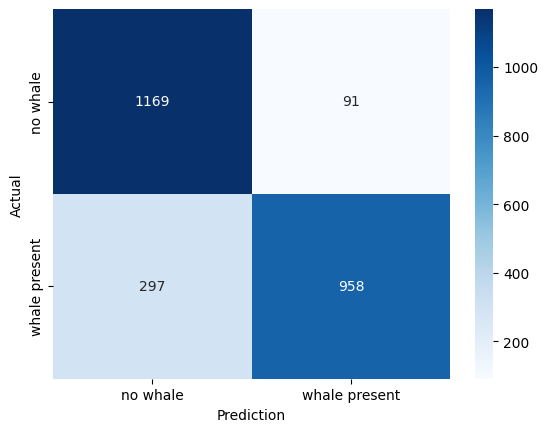

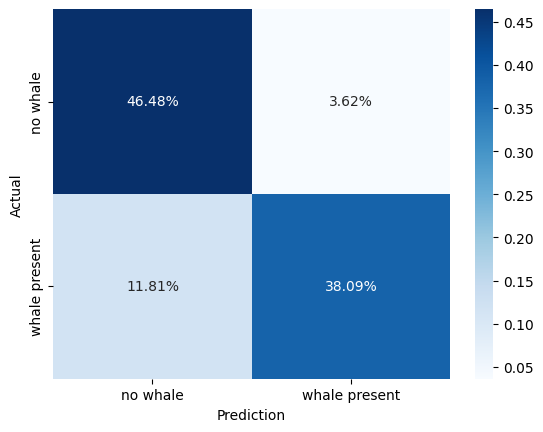

In [ ]:
# Generate Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cf_matrix = confusion_matrix(labels_1d, predictions_1d)#[::-1]

sns.heatmap(
	cf_matrix, 
	annot=True,
	fmt='d',
	xticklabels=total_set.class_names,
	yticklabels=total_set.class_names,
	cmap='Blues'
).set(
	xlabel='Prediction',
	ylabel='Actual'
)
plt.show()

sns.heatmap(
	cf_matrix/np.sum(cf_matrix), 
	annot=True,
	fmt='.2%',
	xticklabels=total_set.class_names,
	yticklabels=total_set.class_names,
	cmap='Blues'
).set(
	xlabel='Prediction',
	ylabel='Actual'
)
plt.savefig(file_name+'-training-confusion_matrix-onrandominf0.8training.png')
plt.show()
